## Jupyter Notebook for plotting Terahertz output files

### Imports + Utility Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.rcParams.update({'font.size': 22})

def radToDeg(x):
    '''
    Convert radiant x to degree.
    '''
    return x * 180 / np.pi

def deleteLinesOfFile(file, numDelimiters, delimiter=';'):
    '''
    Delete lines in file which have wrong number of delimiters.
    '''
    with open(file, "r") as f:
        lines = f.readlines()
    with open(file, "w") as f:
        for line in lines:
            if line.count(delimiter) == numDelimiters:
                f.write(line)

def dB(x):
    return 10 *np.log10(x)

numSamples = 10
numPeriods = 10
numBits = 100
maxNumSamples = numSamples * numPeriods * numBits

### Path Loss Plot

        Time [ms]    Distance [mm]    Path Loss [dB]
----  -----------  ---------------  ----------------
Min:    0                 -5.60488           299.976
Max:    9.999e-05         -5.60487           299.976


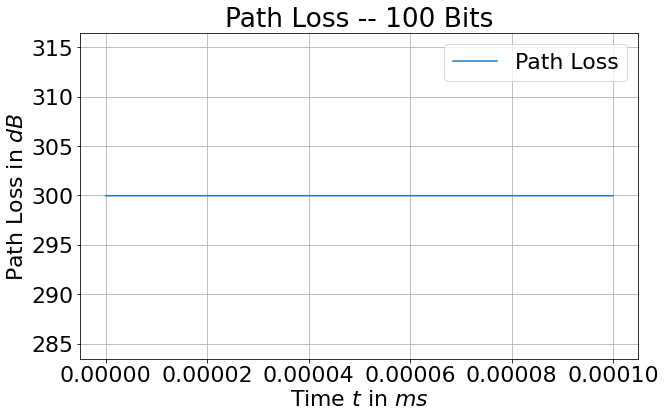

In [29]:
file = "data/terahertz_output_path_loss.csv"
deleteLinesOfFile(file, 2)
data = np.genfromtxt(file , delimiter=";", skip_header=1)[:maxNumSamples]

time = data[:,0] * 1e3
distance = data[:,1] * 1e3
loss = data[:,2]

tab = np.array([
    ["Min: ", min(time), min(distance), min(loss)], 
    ["Max: ", max(time), max(distance), max(loss)]])
print(tabulate(tab, headers=["","Time [ms]", "Distance [mm]", "Path Loss [dB]"]))

plt.figure("path loss", figsize=(10,6))
plt.plot(time, loss, label="Path Loss")
plt.title("Path Loss -- {} Bits".format(numBits))
plt.ylabel("Path Loss in $dB$")
plt.xlabel("Time $t$ in $ms$")
plt.grid()
plt.legend()
plt.savefig("plots/terahertz_plot_path_loss.pdf")
plt.savefig("plots/terahertz_plot_path_loss.png")
plt.show()

### Signal Gain Plot

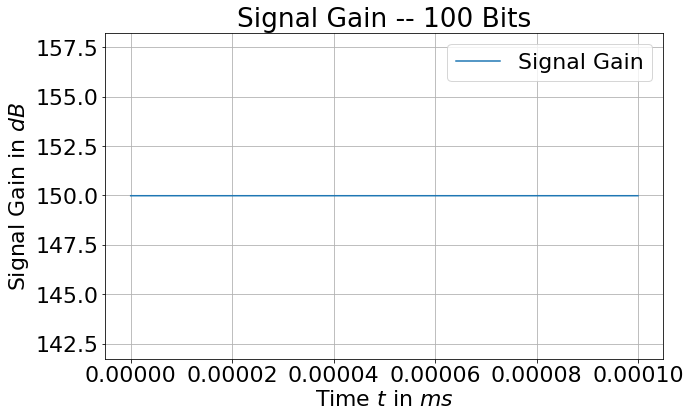

In [30]:
file = "data/terahertz_output_gain.csv"
deleteLinesOfFile(file, 2)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[:maxNumSamples]

time = data[:,0] * 1e3
distance = data[:,1] * 1e3
gain = data[:,2]

plt.figure("Gain", figsize=(10,6))
plt.plot(time, gain, label="Signal Gain")
plt.title("Signal Gain -- {} Bits".format(numBits))
plt.ylabel("Signal Gain in $dB$")
plt.xlabel("Time $t$ in $ms$")
plt.grid()
plt.legend()
plt.savefig("plots/terahertz_plot_gain.pdf")
plt.savefig("plots/terahertz_plot_gain.png")
plt.show()

### Outgoing Signal

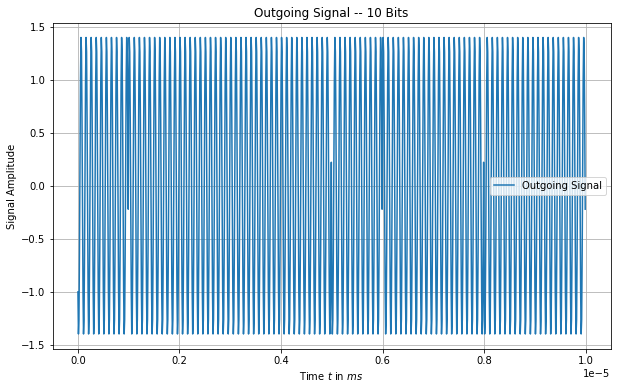

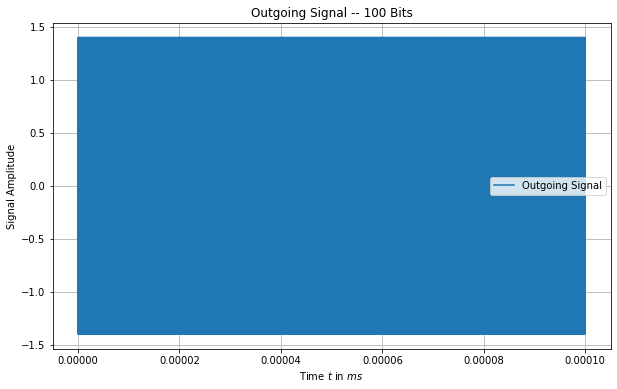

In [3]:
file = "data/terahertz_output_send_signal.csv"
deleteLinesOfFile(file, 2)
for bits in [10, 100]:
    data = np.genfromtxt(file, delimiter=";", skip_header=1)[:numPeriods * numSamples * bits]

    time = data[:,0] * 1e3
    distance = data[:,1] * 1e3
    signal = data[:,2]

    plt.figure("Outgoing Signal -- {} Bits".format(bits), figsize=(10, 6))
    plt.plot(time, signal, label="Outgoing Signal")
    plt.title("Outgoing Signal -- {} Bits".format(bits))
    plt.xlabel("Time $t$ in $ms$")
    plt.ylabel("Signal Amplitude")
    plt.grid()
    plt.legend()
    plt.savefig("plots/terahertz_plot_outgoing_signal_{}_bits.pdf".format(bits))
    plt.savefig("plots/terahertz_plot_outgoing_signal_{}_bits.png".format(bits))
plt.show()

### Received Signal with Doppler and Gain

In [4]:
file ="data/terahertz_output_recv_signal.csv"
deleteLinesOfFile(file, 2)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[0:int(maxNumSamples/10)]

time = data[:,0] * 1e3
distance = data[:,1] * 1e3
signal = data[:,2] * 1e3

plt.figure("Received Signal", figsize=(10, 6))
plt.plot(time, signal, label="Outgoing Signal")
plt.title("Received Signal -- {} Bits".format(int(numBits/10)))
plt.xlabel("Time $t$ in $ms$")
plt.ylabel("Signal Amplitude in $mW$")
plt.grid()
plt.legend()
plt.savefig("plots/terahertz_plot_received_signal.pdf")
plt.savefig("plots/terahertz_plot_received_signal.png")
plt.show()

C:\Users\archs\AppData\Local\Temp\ipykernel_14244\829580073.py:3: UserWarning: genfromtxt: Empty input file: "data/terahertz_output_recv_signal.csv"
  data = np.genfromtxt(file, delimiter=";", skip_header=1)[0:int(maxNumSamples/10)]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### demod receive signal

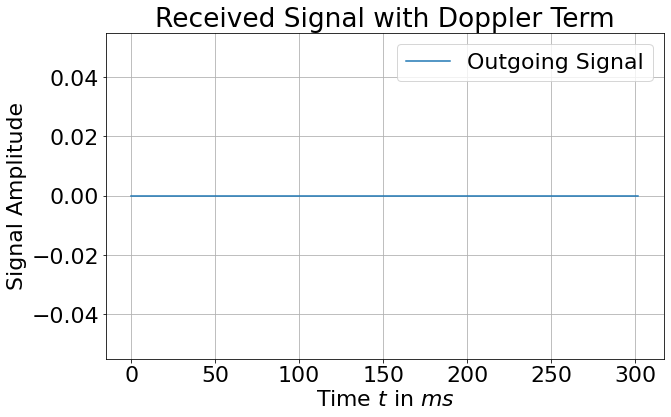

In [33]:
file ="data/terahertz_output_demod_signal.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[0:int(maxNumSamples/10)]
#data = np.genfromtxt(file, delimiter=";", skip_header=1)[0:maxNumSamples]

signal = data[:,1]

plt.figure("Received Signal with Doppler", figsize=(10, 6))
plt.plot(signal, label="Outgoing Signal")
plt.title("Received Signal with Doppler Term")
plt.xlabel("Time $t$ in $ms$")
plt.ylabel("Signal Amplitude")
plt.grid()
plt.legend()
plt.savefig("plots/terahertz_plot_received_signal.pdf")
plt.savefig("plots/terahertz_plot_received_signal.png")
plt.show()